In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt

In [4]:
surrogate_times = tf.linspace(-20000., 100., 40000)

In [80]:
surrogate_times[1] - surrogate_times[0]

<tf.Tensor: shape=(), dtype=float32, numpy=0.5019531>

In [106]:
# dt = tf.expand_dims(tf.constant(surrogate_times[1] - surrogate_times[0]), 0)
dt = surrogate_times[1] - surrogate_times[0]

In [107]:
dt

<tf.Tensor: shape=(), dtype=float32, numpy=0.5019531>

In [5]:
surrogate_times

<tf.Tensor: shape=(40000,), dtype=float32, numpy=
array([-20000.     , -19999.498  , -19998.994  , ...,     98.99609,
           99.49805,    100.     ], dtype=float32)>

In [11]:
surrogate_times[surrogate_times > 97]

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([ 97.48828 ,  97.990234,  98.49219 ,  98.99609 ,  99.49805 ,
       100.      ], dtype=float32)>

In [12]:
surrogate_times[surrogate_times > 98]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 98.49219,  98.99609,  99.49805, 100.     ], dtype=float32)>

In [96]:
tf.where(tf.greater(surrogate_times,97) & tf.less(surrogate_times,97+dt))

<tf.Tensor: shape=(1, 1), dtype=int64, numpy=array([[39994]])>

In [92]:
tf.where( tf.greater(surrogate_times, tf.constant([[97.]])))

<tf.Tensor: shape=(6, 2), dtype=int64, numpy=
array([[    0, 39994],
       [    0, 39995],
       [    0, 39996],
       [    0, 39997],
       [    0, 39998],
       [    0, 39999]])>

In [116]:
tf.expand_dims(97. + dt, 0)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([97.50195], dtype=float32)>

In [117]:
output_idx = tf.where( tf.greater(surrogate_times, tf.constant([[97.], [98.]])) & tf.less(surrogate_times, tf.convert_to_tensor([[tf.constant(97.) + dt], [tf.constant(98.) + dt]])) )

In [117]:
output_idx = tf.where( tf.greater(surrogate_times, tf.constant([[97.], [98.]])) & tf.less(surrogate_times, tf.convert_to_tensor([[tf.constant(97.) + dt], [tf.constant(98.) + dt]])) )

In [131]:
[97.+dt] + [98.+dt]

[<tf.Tensor: shape=(), dtype=float32, numpy=97.50195>,
 <tf.Tensor: shape=(), dtype=float32, numpy=98.50195>]

In [124]:
tf.expand_dims(tf.expand_dims(97. + dt, 0),0)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[97.50195]], dtype=float32)>

In [126]:
tf.convert_to_tensor([[tf.constant(97.) + dt], [tf.constant(98.) + dt]])

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[97.50195],
       [98.50195]], dtype=float32)>

In [118]:
output_idx

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[    0, 39994],
       [    1, 39996]])>

In [119]:
tf.gather_nd( tf.stack((surrogate_times, surrogate_times)), output_idx )

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([97.48828, 98.49219], dtype=float32)>

In [74]:
tf.where( tf.greater(surrogate_times, tf.constant([[97.]])) & tf.less(surrogate_times, tf.convert_to_tensor([[tf.constant(97.) + dt]])) )

<tf.Tensor: shape=(1, 2), dtype=int64, numpy=array([[    0, 39994]])>

In [132]:
# tf.where( tf.greater(surrogate_times, tf.constant([[97.]])) & tf.less(surrogate_times, tf.constant([[97.+dt],[98.+dt]])) )

In [34]:
tf.where(surrogate_times > tf.constant([[97.],[98.]]))

<tf.Tensor: shape=(10, 2), dtype=int64, numpy=
array([[    0, 39994],
       [    0, 39995],
       [    0, 39996],
       [    0, 39997],
       [    0, 39998],
       [    0, 39999],
       [    1, 39996],
       [    1, 39997],
       [    1, 39998],
       [    1, 39999]])>

In [51]:
tf.stack((surrogate_times,surrogate_times))

<tf.Tensor: shape=(2, 40000), dtype=float32, numpy=
array([[-20000.     , -19999.498  , -19998.994  , ...,     98.99609,
            99.49805,    100.     ],
       [-20000.     , -19999.498  , -19998.994  , ...,     98.99609,
            99.49805,    100.     ]], dtype=float32)>

In [49]:
tf.expand_dims(surrogate_times, 0)

<tf.Tensor: shape=(1, 40000), dtype=float32, numpy=
array([[-20000.     , -19999.498  , -19998.994  , ...,     98.99609,
            99.49805,    100.     ]], dtype=float32)>

In [52]:
tf.gather_nd(tf.stack((surrogate_times,surrogate_times)), tf.where(surrogate_times > tf.constant([[97.],[98.]])))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 97.48828 ,  97.990234,  98.49219 ,  98.99609 ,  99.49805 ,
       100.      ,  98.49219 ,  98.99609 ,  99.49805 , 100.      ],
      dtype=float32)>

In [133]:
# tf.gather_nd(surrogate_times, tf.where(surrogate_times > tf.constant([[97.],[98.]])))

In [29]:
# surrogate_times[surrogate_times > tf.constant([[97.],[98.]])]

In [134]:
# just using index maths

In [392]:
x = tf.linspace(0., 10., 10)

In [393]:
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 0.       ,  1.1111112,  2.2222223,  3.3333335,  4.4444447,
        5.555556 ,  6.666667 ,  7.777778 ,  8.888889 , 10.       ],
      dtype=float32)>

In [394]:
dx = x[1]-x[0]

In [395]:
dx

<tf.Tensor: shape=(), dtype=float32, numpy=1.1111112>

In [401]:
target = 3.5

In [404]:
target_index = tf.cast(target/dx, tf.int32)
print(target_index)

tf.Tensor(3, shape=(), dtype=int32)


In [403]:
x[target_index]

<tf.Tensor: shape=(), dtype=float32, numpy=3.3333335>

In [505]:
surrogate_times = tf.linspace(
    tf.cast(-20000., tf.float64),
    100.,
    40000) #+ 20000.


In [506]:
surrogate_times[-1]

<tf.Tensor: shape=(), dtype=float64, numpy=100.0>

In [507]:
surrogate_times[-1]-surrogate_times[0]

<tf.Tensor: shape=(), dtype=float64, numpy=20100.0>

In [508]:
dt = surrogate_times[1] - surrogate_times[0]

In [509]:
dt

<tf.Tensor: shape=(), dtype=float64, numpy=0.5025125628126261>

In [510]:
N = surrogate_times.shape[0]

In [544]:
# target_time = tf.constant([97.], dtype=tf.float64)
# target_time = tf.constant([100.], dtype=tf.float64)
target_time = tf.constant([-19936.912], dtype=tf.float64)
# target_time = tf.constant([-19999.], dtype=tf.float64)
# target_time = tf.constant([-20000.], dtype=tf.float64)
# target_time = tf.constant([0.], dtype=tf.float64)


In [545]:
dt

<tf.Tensor: shape=(), dtype=float64, numpy=0.5025125628126261>

In [546]:
tmax = surrogate_times[-1]-surrogate_times[0]

In [547]:
# target_index = tf.cast(N + tf.floor((target_time-surrogate_times[-1]) / dt), tf.int32)
target_index = tf.cast(tf.floor((20000. + target_time) / dt), tf.int32)
print(target_index)

tf.Tensor([125], shape=(1,), dtype=int32)


In [548]:
tf.gather(surrogate_times, target_index)

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([-19937.18592965])>

In [309]:
tf.where(tf.greater(surrogate_times, target_time))[0,0]

<tf.Tensor: shape=(), dtype=int64, numpy=35821>

In [311]:
surrogate_times[tf.where(tf.greater(surrogate_times, target_time))[0,0]]

<tf.Tensor: shape=(), dtype=float32, numpy=-1999.498>

In [279]:
target_times = tf.constant([97., 98.])

In [280]:
target_indexs = tf.cast(N + tf.floor((target_times-surrogate_times[-1]) / dt), tf.int32)
print(target_indexs)

tf.Tensor([39994 39996], shape=(2,), dtype=int32)


In [281]:
tf.gather(surrogate_times, target_indexs)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([97.48828, 98.49219], dtype=float32)>

# different total masses but same sample rate

In [84]:
a1 = np.arange(-200, 100, 0.1)

In [85]:
a2 = np.arange(-200, 100, 0.2)

In [172]:
a1[1]-a1[0]

0.09999999999999432

In [177]:
tf.range(1.*len(a1))

<tf.Tensor: shape=(3000,), dtype=float32, numpy=
array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.997e+03, 2.998e+03,
       2.999e+03], dtype=float32)>

In [180]:
b1 = (tf.range(tf.cast(len(a1), tf.float64))) * tf.cast((a1[1]-a1[0]), tf.float64) - 200

In [191]:
a1dt = a1[1]-a1[0]
a2dt = a2[1]-a2[0]

In [193]:
tfdt = tf.cast([[a1dt],[a2dt]], tf.float64)

In [195]:
b1b2 = (tf.range(tf.cast(len(a1), tf.float64))) * tfdt - 200

In [196]:
b1b2

<tf.Tensor: shape=(2, 3000), dtype=float64, numpy=
array([[-200. , -199.9, -199.8, ...,   99.7,   99.8,   99.9],
       [-200. , -199.8, -199.6, ...,  399.4,  399.6,  399.8]])>

In [181]:
a1[0]

-200.0

In [182]:
b1[0]

<tf.Tensor: shape=(), dtype=float64, numpy=-200.0>

In [183]:
a1[1] - a1[0]

0.09999999999999432

In [184]:
b1[1] - b1[0]

<tf.Tensor: shape=(), dtype=float64, numpy=0.09999999999999432>

In [185]:
len(a1)

3000

In [186]:
len(b1)

3000

In [187]:
a1[-1]

99.89999999998292

In [188]:
b1[-1]

<tf.Tensor: shape=(), dtype=float64, numpy=99.89999999998292>

In [189]:
a1==b1

<tf.Tensor: shape=(3000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

In [7]:
import phenom

In [32]:
dt_M = 1.

In [33]:
dt_M

1.0

In [34]:
mtot = np.array([[10.], [20.]])

In [38]:
dt_S = phenom.MtoS(dt_M, mtot)

In [39]:
dt_S

array([[4.92549103e-05],
       [9.85098205e-05]])

In [37]:
target_dt_S = 0.1

In [40]:
phenom.StoM(target_dt_S, mtot)

array([[2030.25443517],
       [1015.12721759]])

In [54]:
def compute_dtM_array(seglen, sample_rate, mtot):
    sample_rate_M = phenom.StoM(sample_rate, mtot)
    seglen_M = phenom.StoM(seglen, mtot)
    
    print(f"sample_rate_M = {sample_rate_M}")
    print(f"seglen_M = {seglen_M}")
    
    times_M = np.arange(int(seglen_M)) * sample_rate_M
    
    print(f"times_M.shape = {times_M.shape}")
    print(f"\Delta times_M = {times_M[1] - times_M[0]}")
    
    print(f"\Delta times_M (seconds) = {phenom.MtoS(times_M[1] - times_M[0], mtot)}")
    
    return times_M

In [57]:
t_m60 = compute_dtM_array(4, 1/2048., 60)

sample_rate_M = 1.6522252890393057
seglen_M = 13535.029567809992
times_M.shape = (13535,)
\Delta times_M = 1.6522252890393057
\Delta times_M (seconds) = 0.00048828125


In [58]:
t_m120 = compute_dtM_array(4, 1/2048., 120)

sample_rate_M = 0.8261126445196528
seglen_M = 6767.514783904996
times_M.shape = (6767,)
\Delta times_M = 0.8261126445196528
\Delta times_M (seconds) = 0.00048828125


In [60]:
import matplotlib.pyplot as plt

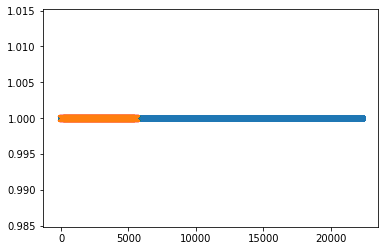

In [76]:
plt.figure()
plt.scatter(t_m60, np.ones(t_m60.shape))
plt.scatter(t_m120, np.ones(t_m120.shape), marker='x')
# plt.xlim(0, 10)

(0, 10)

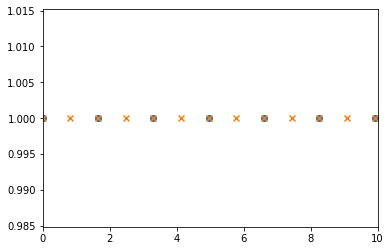

In [75]:
plt.figure()
plt.scatter(t_m60, np.ones(t_m60.shape))
plt.scatter(t_m120, np.ones(t_m120.shape), marker='x')
plt.xlim(0, 10)

(0, 0.01)

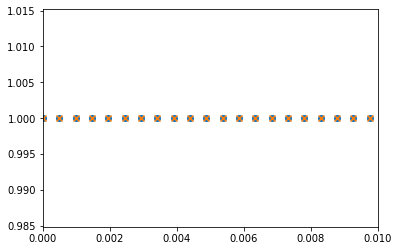

In [73]:
plt.figure()
plt.scatter(phenom.MtoS(t_m60, 60), np.ones(t_m60.shape))
plt.scatter(phenom.MtoS(t_m120, 120), np.ones(t_m120.shape), marker='x')
plt.xlim(0, 0.01)

# pycbc detector frame waveforms

In [3]:
from pycbc import psd as pypsd
from pycbc.inference.models import GaussianNoise
from pycbc.waveform.generator import (FDomainDetFrameGenerator,
                                      FDomainCBCGenerator)
seglen = 4
sample_rate = 2048
N = seglen*sample_rate/2+1
fmin = 30.
static_params = {'approximant': 'IMRPhenomD', 'f_lower': fmin,
                 'mass1': 38.6, 'mass2': 29.3,
                 'spin1z': 0., 'spin2z': 0., 'ra': 1.37, 'dec': -1.26,
                 'polarization': 2.76, 'distance': 3*500.}
variable_params = ['tc']
tsig = 3.1
generator = FDomainDetFrameGenerator(
    FDomainCBCGenerator, 0., detectors=['H1', 'L1'],
    variable_args=variable_params,
    delta_f=1./seglen, **static_params)
signal = generator.generate(tc=tsig)
psd = pypsd.aLIGOZeroDetHighPower(N, 1./seglen, 20.)
psds = {'H1': psd, 'L1': psd}
low_frequency_cutoff = {'H1': fmin, 'L1': fmin}
model = GaussianNoise(variable_params, signal, low_frequency_cutoff,
                          psds=psds, static_params=static_params)

/Users/spx8sk/anaconda3/envs/scrinet-dev/lib/python3.7/site-packages/pycbc/psd/analytical.py:103: RuntimeWarning: forcing length argument to int
  warnings.warn('forcing length argument to int', RuntimeWarning)


In [4]:
model.update(tc=tsig)

In [5]:
print('{:.2f}'.format(model.loglr))
print('{:.2f}'.format(model.logplr))

282.43
282.43


In [6]:
signal

{'H1': <pycbc.types.frequencyseries.FrequencySeries at 0x1a3c0f7790>,
 'L1': <pycbc.types.frequencyseries.FrequencySeries at 0x1a41789f90>}

# tfp interp

In [3]:
from tensorflow_probability.python.math import interpolation as tfp_interp

In [65]:
x = np.linspace(0, 10, 10)
xnew = np.linspace(0, 10, 30)
xnew2 = np.linspace(3, 8, 30)

xnew3 = np.linspace(-5, 13, 30)

y = np.sin(0.1*x)+0.1

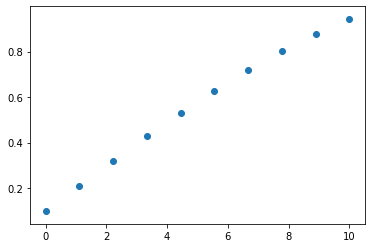

In [66]:
plt.figure()
plt.scatter(x, y)

In [67]:
ynew = tfp_interp.batch_interp_regular_1d_grid(
    x = xnew,
    x_ref_min=x[0],
    x_ref_max=x[-1],
    y_ref=y
)

In [68]:
ynew2 = tfp_interp.batch_interp_regular_1d_grid(
    x = xnew2,
    x_ref_min=x[0],
    x_ref_max=x[-1],
    y_ref=y
)

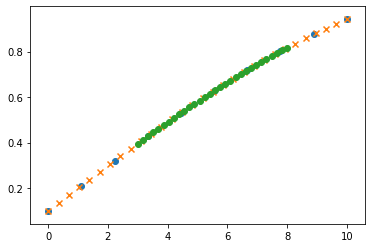

In [69]:
plt.figure()
plt.scatter(x, y)
plt.scatter(xnew, ynew, marker='x')
plt.scatter(xnew2, ynew2, marker='o')

In [74]:
ynew_batch = tfp_interp.batch_interp_regular_1d_grid(
    x = tf.stack((xnew, xnew2, xnew3)),
    x_ref_min=x[0],
    x_ref_max=x[-1],
    y_ref=y,
    fill_value=0
)

In [75]:
ynew_batch

<tf.Tensor: shape=(3, 30), dtype=float64, numpy=
array([[0.1       , 0.13441185, 0.1688237 , 0.20323555, 0.23731731,
        0.27130476, 0.30529221, 0.33881101, 0.37195489, 0.40509878,
        0.43782521, 0.46971677, 0.50160832, 0.53331702, 0.56356292,
        0.59380883, 0.62405473, 0.65250626, 0.68073349, 0.70896073,
        0.73561009, 0.76147053, 0.78733097, 0.81199774, 0.83517245,
        0.85834715, 0.88086151, 0.90106467, 0.92126783, 0.94147098],
       [0.39515561, 0.41172755, 0.42825775, 0.44420352, 0.4601493 ,
        0.47609508, 0.49204085, 0.50798663, 0.5239324 , 0.5393662 ,
        0.55448915, 0.5696121 , 0.58473506, 0.59985801, 0.61498096,
        0.62992447, 0.64403809, 0.65815171, 0.67226532, 0.68637894,
        0.70049256, 0.71460617, 0.72785196, 0.74078218, 0.7537124 ,
        0.76664262, 0.77957284, 0.79250305, 0.80504533, 0.81663269],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.1585001

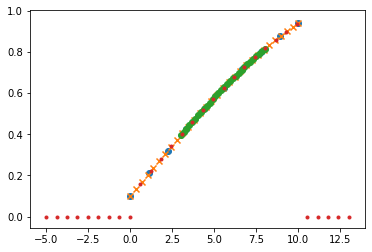

In [76]:
plt.figure()
plt.scatter(x, y)
plt.scatter(xnew, ynew_batch[0], marker='x')
plt.scatter(xnew2, ynew_batch[1], marker='o')
plt.scatter(xnew3, ynew_batch[2], marker='.')

# interpolating different length tensors onto same length grid

In [81]:
x = np.linspace(0, 10, 10)

y1 = np.sin(0.1*x)+0.1
y2 = np.sin(0.2*x)+0.1

xnew1 = np.linspace(0, 10, 30)
xnew2 = np.linspace(3, 8, 30)

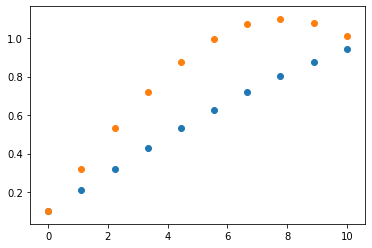

In [82]:
plt.figure()
plt.scatter(x, y1)
plt.scatter(x, y2)

In [98]:
y1prime = y1[x>2]
y2prime = y2[x>4]

x1prime = x[x>2]
x2prime = x[x>4]

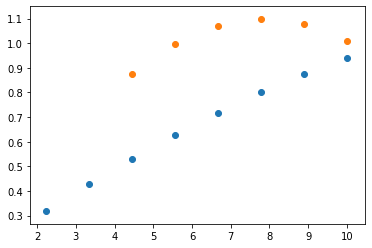

In [99]:
plt.figure()
plt.scatter(x1prime, y1prime)
plt.scatter(x2prime, y2prime)

In [102]:
y1prime.shape

(8,)

In [103]:
y2prime.shape

(6,)

In [118]:
tf.constant([[1,1]])

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 1]], dtype=int32)>

In [176]:
y2prime_padded = tf.pad(
    y2prime,
    [[1,1]] # number of padding on each size
)

In [177]:
y2prime_padded

<tf.Tensor: shape=(8,), dtype=float64, numpy=
array([0.        , 0.87637192, 0.9961922 , 1.0719379 , 1.09988386,
       1.0786557 , 1.00929743, 0.        ])>

In [178]:
yprime_stack = tf.stack((y1prime, y2prime_padded))

In [182]:
x1prime_new = np.linspace(x1prime[0], x1prime[-1], 30)
x2prime_new = np.linspace(x2prime[0], x2prime[-1], 30)

In [183]:
ynew_batch = tfp_interp.batch_interp_regular_1d_grid(
    x = ((x1prime_new, x2prime_new)),
    x_ref_min=((x1prime[0], x2prime[0])),
    x_ref_max=((x1prime[-1], x2prime[-1])),
    y_ref=yprime_stack,
    fill_value=0)

In [184]:
plt.figure()
plt.plot(x, y1, c='C0', fillstyle='none', marker='o', ls='')
plt.plot(x, y2, c='C1', fillstyle='none', marker='o', ls='')
plt.scatter(x1prime_new, ynew_batch[0], c='C0', marker='x')
plt.scatter(x2prime_new, ynew_batch[1], c='C1', marker='x')

# try using actual surrogate example data to make things more concrete

In [189]:
import os
from scrinet.workflow.pipe_utils import load_model

def setup_surrogate(user="sk"):
    if user == "sk":
#         rootdir = "/Users/spx8sk/work/data/scrinet/3D_NP"
        rootdir = "/Users/spx8sk/work/data/scrinet/ann-sur-final-model"
    elif user == "rg":
        rootdir = '/Users/Rhys/Documents/PhD/PE/NN_for_PE/3D_NP'
        
    amp_basis = os.path.join(rootdir, "amp_eim_basis.npy")
    amp_model_dir = os.path.join(rootdir, "results_4_320_relu_Adam")

    phase_basis = os.path.join(rootdir, "phase_eim_basis.npy")
    phase_model_dir = os.path.join(rootdir, "results_4_320_softplus_Adamax")

    amp_model, amp_basis = load_model(
        basis_file=amp_basis,
        nn_weights_file=os.path.join(amp_model_dir, "model.h5"),
        X_scalers_file=os.path.join(amp_model_dir, "X_scalers.npy"),
        Y_scalers_file=""
    )

    phase_model, phase_basis = load_model(
        basis_file=phase_basis,
        nn_weights_file=os.path.join(phase_model_dir, "model.h5"),
        X_scalers_file=os.path.join(phase_model_dir, "X_scalers.npy"),
        Y_scalers_file=os.path.join(phase_model_dir, "y_scalers.npy")
    )
    
    amp_basis = tf.convert_to_tensor(amp_basis, dtype = tf.float32)
    phase_basis = tf.convert_to_tensor(phase_basis, dtype = tf.float32)
    
    return amp_model, amp_basis, phase_model, phase_basis

# @tf.function(experimental_compile=True, autograph=True, experimental_relax_shapes=True)
def amp_predict_hack(model, _input):
    """
    Function to re-create model.predict(input) but allows the graph to be built correctly
    (see https://github.com/tensorflow/tensorflow/issues/33997)

    :param model: A trained scrinet Neural Network
    :param _input: The point at which you want to make a prediction
    :return:
    """
    x = _input
    x = x_scale_hack(model, x)
    pred = tf.convert_to_tensor(x)
    # the three should be an argument for ndim of problem
    pred = tf.reshape(pred, shape=(-1, 3))
    net_layers = model.model.layers
    output_shape = net_layers[-1].output_shape[-1]
    for layer in net_layers:
        pred = layer(pred)
    pred = tf.reshape(
        pred, shape=(-1, output_shape,))
    return pred


# @tf.function(experimental_compile=True, autograph=True, experimental_relax_shapes=True)
def phase_predict_hack(model, _input):
    """
    Function to re-create model.predict(input) but allows the graph to be built correctly
    (see https://github.com/tensorflow/tensorflow/issues/33997)

    :param model: A trained scrinet Neural Network
    :param _input: The point at which you want to make a prediction
    :return:
    """
    x = _input
    x = x_scale_hack(model, x)
    pred = tf.convert_to_tensor(x)
    # the three should be an argument for ndim of problem
    pred = tf.reshape(pred, shape=(-1, 3))
    net_layers = model.model.layers
    output_shape = net_layers[-1].output_shape[-1]
    for layer in net_layers:
        pred = layer(pred)
    pred = tf.reshape(
        pred, shape=(-1, output_shape,))
#     pred = y_inv_scale_hack(model, pred)
    pred = y_inv_minmax_scale_hack(model, pred)
    return pred


# @tf.function(experimental_compile=True, experimental_relax_shapes=True)
def x_scale_hack(model, _input):
    """
    Function to re-create sklearn standard scaler for the input (as a tensorflow function)

    :param model: A trained scrinet Neural Network
    :param _input: The point at which you want to scale
    :return:
    """
    x = _input
    means = tf.constant([model.X_scalers[i].mean_[0]
                         for i in range(x.shape[0])])
    stds = tf.constant([model.X_scalers[i].scale_[0]
                        for i in range(x.shape[0])])
    means = tf.cast(means, tf.float32)
    stds = tf.cast(stds, tf.float32)

    x_scaled = (tf.reshape(x, shape=(-1, x.shape[0],)) - means) / stds
    x_scaled = tf.cast(x_scaled, tf.float32)
    return x_scaled


# @tf.function(experimental_compile=True, experimental_relax_shapes=True)
def get_model_y_std_scalers(model, _input):
    """
    Re-casts the sklearn output std scalers for each output basis

    :param model: A trained scrinet Neural Network
    :param _input: The point at which you want to scale
    :return:
    """
    std = [model.Y_scalers[i].scale_[0] for i in range(_input.shape[1])]
    std = tf.stack(std, axis=0)
    std = tf.cast(std, tf.float32)
    return std


# @tf.function(experimental_compile=True, experimental_relax_shapes=True)
def get_model_y_mean_scalers(model, _input):
    """
    Re-casts the sklearn output mean scalers for each output basis

    :param model: A trained scrinet Neural Network
    :param _input: The point at which you want to scale
    :return:
    """
    mean = [model.Y_scalers[i].mean_[0] for i in range(_input.shape[1])]
    mean = tf.stack(mean, axis=0)
    mean = tf.cast(mean, tf.float32)
    return mean


# @tf.function(experimental_compile=True, experimental_relax_shapes=True)
def y_inv_scale_hack(model, _input):
    """
    Re-creates the sklearn inverse standard scaler as a tensorflow function,

    :param model: A trained scrinet Neural Network
    :param _input: The point at which you want to scale
    :return:
    """
    y_scaled = _input
    y_scaled = tf.reshape(y_scaled, shape=(-1, y_scaled.shape[1]))

    mean = get_model_y_mean_scalers(model, _input)

    std = get_model_y_std_scalers(model, _input)
    y = y_scaled * std + mean
    return y

# @tf.function(experimental_compile=True, experimental_relax_shapes=True)
def get_model_y_minmax_scale_scalers(model, _input):
    """
    Re-casts the sklearn output scale scalers for each output basis

    :param model: A trained scrinet Neural Network
    :param _input: The point at which you want to scale
    :return:
    """
    scale = [model.Y_scalers[i].scale_[0] for i in range(_input.shape[1])]
    scale = tf.stack(scale, axis=0)
    scale = tf.cast(scale, tf.float32)
    return scale


# @tf.function(experimental_compile=True, experimental_relax_shapes=True)
def get_model_y_minmax_min_scalers(model, _input):
    """
    Re-casts the sklearn output min scalers for each output basis

    :param model: A trained scrinet Neural Network
    :param _input: The point at which you want to scale
    :return:
    """
    mins = [model.Y_scalers[i].min_[0] for i in range(_input.shape[1])]
    mins = tf.stack(mins, axis=0)
    mins = tf.cast(mins, tf.float32)
    return mins


# @tf.function(experimental_compile=True, experimental_relax_shapes=True)
def y_inv_minmax_scale_hack(model, _input):
    """
    Re-creates the sklearn inverse standard scaler as a tensorflow function,

    :param model: A trained scrinet Neural Network
    :param _input: The point at which you want to scale
    :return:
    """
    y_scaled = _input
    y_scaled = tf.reshape(y_scaled, shape=(-1, y_scaled.shape[1]))

    mins = get_model_y_minmax_min_scalers(model, _input)

    scale = get_model_y_minmax_scale_scalers(model, _input)
    y = (y_scaled - mins) / scale
    return y




# we need a function to tell us the time before merger for a particular frequency
# we can estimate this using PN
# from https://github.com/gwastro/pycbc/blob/master/pycbc/waveform/spa_tmplt.py
# non-spinning only
# removed the 'porder' and hardcoding max-order
# @tf.function(experimental_relax_shapes=True)
# @tf.function()
def tf_findchirp_chirptime(m1, m2, fLower):
    # variables used to compute chirp time
    m = m1 + m2
    eta = m1 * m2 / m / m
    c0T = c2T = c3T = c4T = c5T = c6T = c6LogT = c7T = 0.

    c7T = lal.PI * (14809.0 * eta * eta / 378.0 - 75703.0 * eta / 756.0 - 15419335.0 / 127008.0)

    c6T = lal.GAMMA * 6848.0 / 105.0 - 10052469856691.0 / 23471078400.0 +\
        lal.PI * lal.PI * 128.0 / 3.0 + \
        eta * (3147553127.0 / 3048192.0 - lal.PI * lal.PI * 451.0 / 12.0) -\
        eta * eta * 15211.0 / 1728.0 + eta * eta * eta * 25565.0 / 1296.0 +\
        eta * eta * eta * 25565.0 / 1296.0 + tf.math.log(4.0) * 6848.0 / 105.0
    c6LogT = 6848.0 / 105.0

    c5T = 13.0 * lal.PI * eta / 3.0 - 7729.0 * lal.PI / 252.0

    c4T = 3058673.0 / 508032.0 + eta * (5429.0 / 504.0 + eta * 617.0 / 72.0)
    c3T = -32.0 * lal.PI / 5.0
    c2T = 743.0 / 252.0 + eta * 11.0 / 3.0
    c0T = 5.0 * m * lal.MTSUN_SI / (256.0 * eta)

    # This is the PN parameter v evaluated at the lower freq. cutoff
    xT = tf.pow (lal.PI * m * lal.MTSUN_SI * fLower, 1.0 / 3.0)
    x2T = xT * xT
    x3T = xT * x2T
    x4T = x2T * x2T
    x5T = x2T * x3T
    x6T = x3T * x3T
    x7T = x3T * x4T
    x8T = x4T * x4T

    # Computes the chirp time as tC = t(v_low)
    # tC = t(v_low) - t(v_upper) would be more
    # correct, but the difference is negligble.

    # This formula works for any PN order, because
    # higher order coeffs will be set to zero.
    return c0T * (1 + c2T * x2T + c3T * x3T + c4T * x4T + c5T * x5T + (c6T + c6LogT * tf.math.log(xT)) * x6T + c7T * x7T) / x8T

# @tf.function(experimental_compile=True)
# @tf.function()
def tf_get_surrogate_index_and_value_at_f_lower(m1,m2,flower):
    """
    returns the first index above the input flower
    and the value at that index
    """
    time_at_flower_sec = -tf_findchirp_chirptime(m1,m2,flower)
    time_at_flower_M = tf.cast(phenom.StoM(time_at_flower_sec, m1+m2), tf.float64)
    
    # hardcoded to the final ann-sur model
    tstart_M = tf.cast(-20000., tf.float64)
    tend_M = 100.
    tnum = 40000
    
    # comment this out to support XLA compilation
    tf.debugging.assert_greater_equal(
        time_at_flower_M,
        tstart_M,
        message=f"error: flower too low. flower = {flower}. time_at_flower_M = {time_at_flower_M}"
    )
    
    surrogate_times = tf.linspace(tstart_M, tend_M, tnum)
    dt_M = surrogate_times[1] - surrogate_times[0]
    
    target_indexs = tf.cast(tf.floor((20000. + time_at_flower_M) / dt_M), tf.int32)
    
    vals = tf.gather(surrogate_times, target_indexs)
    
    return target_indexs, vals

# @tf.function
def y22_func(theta, phi):
    """
    https://lscsoft.docs.ligo.org/lalsuite/lal/_spherical_harmonics_8c_source.html#l00042
    """
    fac = tf.math.sqrt( 5.0 / ( 64.0 * lal.PI ) ) * ( 1.0 + tf.math.cos( theta ))*( 1.0 + tf.math.cos( theta ))
    
    m = tf.cast(2., tf.complex64)
    return tf.math.exp(1.j * m * tf.cast(phi, tf.complex64)) * tf.cast(fac, tf.complex64)

# @tf.function
def y2m2_func(theta, phi):
    """
    https://lscsoft.docs.ligo.org/lalsuite/lal/_spherical_harmonics_8c_source.html#l00042
    """
    fac = tf.math.sqrt( 5.0 / ( 64.0 * lal.PI ) ) * ( 1.0 - tf.math.cos( theta ))*( 1.0 - tf.math.cos( theta ))
    
    m = tf.cast(-2., tf.complex64)
    return tf.math.exp(1.j * m * tf.cast(phi, tf.complex64)) * tf.cast(fac, tf.complex64)

# based on generate_surrogate in sample_helpers.py
def generate_surrogate_amp_phase(
    x, amp_model, amp_basis, phase_model, phase_basis, phase_shift=0.0
):
    """
    generate hplus and hcross

    :param times: time axis shape = (1, len(surrogte basis))
    :param mtotal: total mass

    :param x: The location in parameter space - currently (q, chi1, chi2)
    :param amp_model: The pre-loaded amplitude nn generator
    :param amp_basis: The pre-loaded amplitude basis
    :param phase_model: The pre-loaded phase nn generator
    :param phase_basis: The pre-loaded phase basis
    :param phase_shift: phase shift (default: 0.)
    :return:
    """

    x = tf.transpose(tf.stack([tf.math.log(x[:, 0]), x[:, 1], x[:, 2]], axis=0))
    x = tf.cast(x, tf.float32)
    x = tf.reshape(x, shape=(-1, x.shape[0]))
    x = tf.convert_to_tensor(x, dtype=tf.float32)

    amp_alpha = amp_predict_hack(amp_model, x)

    amp = tf.tensordot(amp_alpha, amp_basis, axes=1)

    phase_alpha = phase_predict_hack(phase_model, x)

    phase = tf.tensordot(phase_alpha, phase_basis, axes=1)

    phase_shift = tf.cast(phase_shift, dtype=phase.dtype)

    phase = phase + phase_shift

    return amp, phase

In [190]:
amp_model, amp_basis, phase_model, phase_basis = setup_surrogate(user="sk")

In [202]:
params = tf.constant([
    [1.,0.,0.],
    [8.,0.,0.]
])

In [203]:
amp, phase = generate_surrogate_amp_phase(params, amp_model, amp_basis, phase_model, phase_basis)

In [204]:
times_M = np.linspace(-20000, 100, 40000)

In [205]:
amp.shape

TensorShape([2, 40000])

In [206]:
plt.figure()
plt.plot(times_M, amp[0])
plt.plot(times_M, amp[1])

In [208]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
def get_freq_from_phase(x, y):
    iy = IUS(x, y)
    dy = iy.derivative()(x)
    return dy

In [219]:
freq0 = get_freq_from_phase(times_M, phase[0])
freq1 = get_freq_from_phase(times_M, phase[1])
freqs = np.row_stack((freq0, freq1))

In [252]:
plt.figure()
plt.plot(times_M, freqs[0])
plt.plot(times_M, freqs[1])


plt.axvline(times_M[37373], c='C0')
plt.axvline(times_M[34582], c='C1')
plt.axhline(-0.05, c='k', ls='--')

In [243]:
np.where(np.less(freqs[0], -0.05))[0][0]

37373

In [244]:
np.where(np.less(freqs[1], -0.05))[0][0]

34582

# extending times to same duration

In [ ]:
# T = N * dt
# N = T/dt

# rect_windown tensorflow

In [11]:
def np_rect_window(length, start_index, end_index):
    
    return np.concatenate((np.zeros(start_index), np.ones(end_index-start_index), np.zeros(length-end_index)))

In [84]:
# @tf.function(experimental_compile=True)
# @tf.function()
def tf_rect_window(length, start_index, end_index):
    
    return tf.concat((tf.zeros(start_index), tf.ones(end_index-start_index), tf.zeros(length-end_index)), axis=0)

In [85]:
tf.zeros(tf.constant([10, 10]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [86]:
tf.ones(tf.constant([2,3]))

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [87]:
tf.concat((tf.zeros(tf.constant([10, 10])), tf.ones(tf.constant([10,3]))), axis=1)

<tf.Tensor: shape=(10, 13), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]],
      dtype=float32)>

In [88]:
tf_win = tf_rect_window(100, 30, 90)

In [65]:
win = np_rect_window(100, 30, 90)

In [66]:
win

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [67]:
tf_win

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [70]:
tf_win.numpy()==win

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [69]:
plt.figure()
plt.plot(win)
plt.plot(tf_win, ls='--')

In [ ]:
# need to vectorise the rect windown function
# so that i can specify the start and end 
# the windows will be the same length though

In [94]:
win_len = [2, 10] # two waveforms, each of length 10
init_win = tf.zeros(win_len)

In [95]:
init_win

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [100]:
mid_len = [3, 4]
mid_win = tf.ones(mid_len)

In [98]:
mid_win

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [111]:
values = tf.ragged.constant([[1, 2], [4]])

In [112]:
values

<tf.RaggedTensor [[1, 2], [4]]>

In [119]:
a=tf.ones(5)[2:3]

In [120]:
a

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [124]:
padded = tf.pad(
    tf.ones(4),
    [[4,2]] # number of padding on each size
)

In [125]:
padded

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 1., 1., 1., 1., 0., 0.], dtype=float32)>

In [130]:
tf.constant([[1, 2, 3], [4, 5, 6]])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [133]:
# tf.pad(
#     tf.ragged.constant([[1, 2], [4]]),
#     [[0, 0], [0, 1]] # number of padding on each size
# )

In [121]:
# doesn't work with tf.function
# A = tf.ragged.constant([
#   [1, 1, 1],
#   [2],
#   [3, 3, 3, 3],
#   [4, 4]])

# list works with tf.function
A = [
  [1, 1, 1],
  [2],
  [3, 3, 3, 3],
  [4, 4]]

In [122]:
A

[[1, 1, 1], [2], [3, 3, 3, 3], [4, 4]]

In [172]:
# https://stackoverflow.com/questions/58847401/how-can-i-fill-a-ragged-tensor-with-zeros-to-make-a-square-tensor
# @tf.function(experimental_compile=True)
# @tf.function()
def func(A, nleft=0, nright=0):
    max_len = max(len(row) for row in A)
    res = tf.stack([tf.pad(row, [[max_len - len(row)+nleft,nright]]) for row in A], axis=0)
    return res

In [173]:
res = func(A,1,1)

In [174]:
res

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 3, 3, 3, 3, 0],
       [0, 0, 0, 4, 4, 0]], dtype=int32)>

In [141]:
# @tf.function(experimental_compile=True)
@tf.function()
def ret():
    a=[[None]*4]*2
    a.append([1,[2]])
    return a
#     return [[1],[2,3]]

In [142]:
ret()

[[None, None, None, None],
 [None, None, None, None],
 [<tf.Tensor: shape=(), dtype=int32, numpy=1>,
  [<tf.Tensor: shape=(), dtype=int32, numpy=2>]]]

In [143]:
# objective
# make a Tensor with shape NxM
# N = number of waveforms
# M = number of time points

# the Tensor will be N rectangular windows
# with different start and end times of the "1's" of the window

In [278]:
N = 2
M = 10

start_end = [[2, 8], [4, 6]]

# @tf.function(experimental_compile=True)
# @tf.function()
def make_rect_window_tensor(N, M, start_end):
    B = []
    for se in start_end:
        B.append([1]*(se[1]-se[0]))
    C = [tf.pad(B[i], [[start_end[i][0], M-start_end[i][1]]]) for i in range(len(start_end))]
    return tf.convert_to_tensor(C)

In [279]:
make_rect_window_tensor(N, M, start_end)

<tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]], dtype=int32)>

In [280]:
tf.convert_to_tensor(C)

<tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]], dtype=int32)>

In [286]:
expected = [
    [0,0,1,1,1,1,1,1,0,0],
    [0,0,0,0,1,1,0,0,0,0]
]
expected = tf.convert_to_tensor(expected)

In [287]:
expected

<tf.Tensor: shape=(2, 10), dtype=int32, numpy=
array([[0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0]], dtype=int32)>

In [301]:
x = tf.linspace(0., 1, M) * tf.ones(shape=(N, 1))
y = tf.math.sin(x)

y_win = y * C

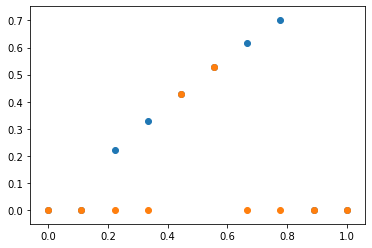

In [303]:
# plt.figure()
# plt.scatter(x[0], y[0])
# plt.scatter(x[0], y[1])

plt.figure()
plt.scatter(x[0], y_win[0])
plt.scatter(x[0], y_win[1])